# This notebook contains the Stacks parameter tests, final parameters used and analyses to identify sex linked markers for the RADseq dataset of <i>Rana italica</i> 
## Sample set:

49 samples in total:
    
- 16 Females, 33 Males

These are in three populations, 

<b>MdM is from Riserva Naturale Statale Montedimezzo</b>:
- 10 Males, 5 females

<b> CM is from an unknown place (Samples from Daniella Canestrelli)</b>:
- 10 males, 9 females

<b> T is from (Samples from Daniella Canestrelli) </b>:
- 13 males, 2 females

All analyses including the outputs below are on HPC: "/archive/dee/perrin/djeffrie/turnover_project/RAD_seq_datasets/Completed/Ritalica1"

Contents:

1. Ustacks parameter tests
2. Cstacks parameter tests
3. Populations parameter tests
4. Identification of sex-linked markers
5. Map sex-linked markers to the genome(s). 
    
**Scripts for Incremental can be found in the Incremental module, 

**custom scripts for analyses of sex-linked markers can be found in the package "MISC_RAD_tools".

In [3]:
%matplotlib inline
import os
import wget ## used "sudo pip install wget" in command line to get package.
import Incremental_U as IncU ## Get this sorted
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [ ]:
%load_ext rpy2.ipython

##Stacks parameter tests --------------------------------------------------------------------------------------------------

###1. Ustacks

Files for the analyses below were transfered from the demultiplexed fastq.gz files on the archive.


In [8]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/Ritalica/Incremental/Ustacks/"

In [9]:
## INPUT INCREMENTAL PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                                             ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                                                 ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                                        ## Int. eg 7
parent_dir = Incrememntal_test_directory    ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                            ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


/home/djeffrie/Data/RADseq/Ritalica/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'itaT1.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                   'MS': { 2: { }, 3: { }, 4: { }},
                   'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'itaT10.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'itaT11.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'itaT12.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'itaT13.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 2: { }, 3: { }, 4: { }, 5: { }

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


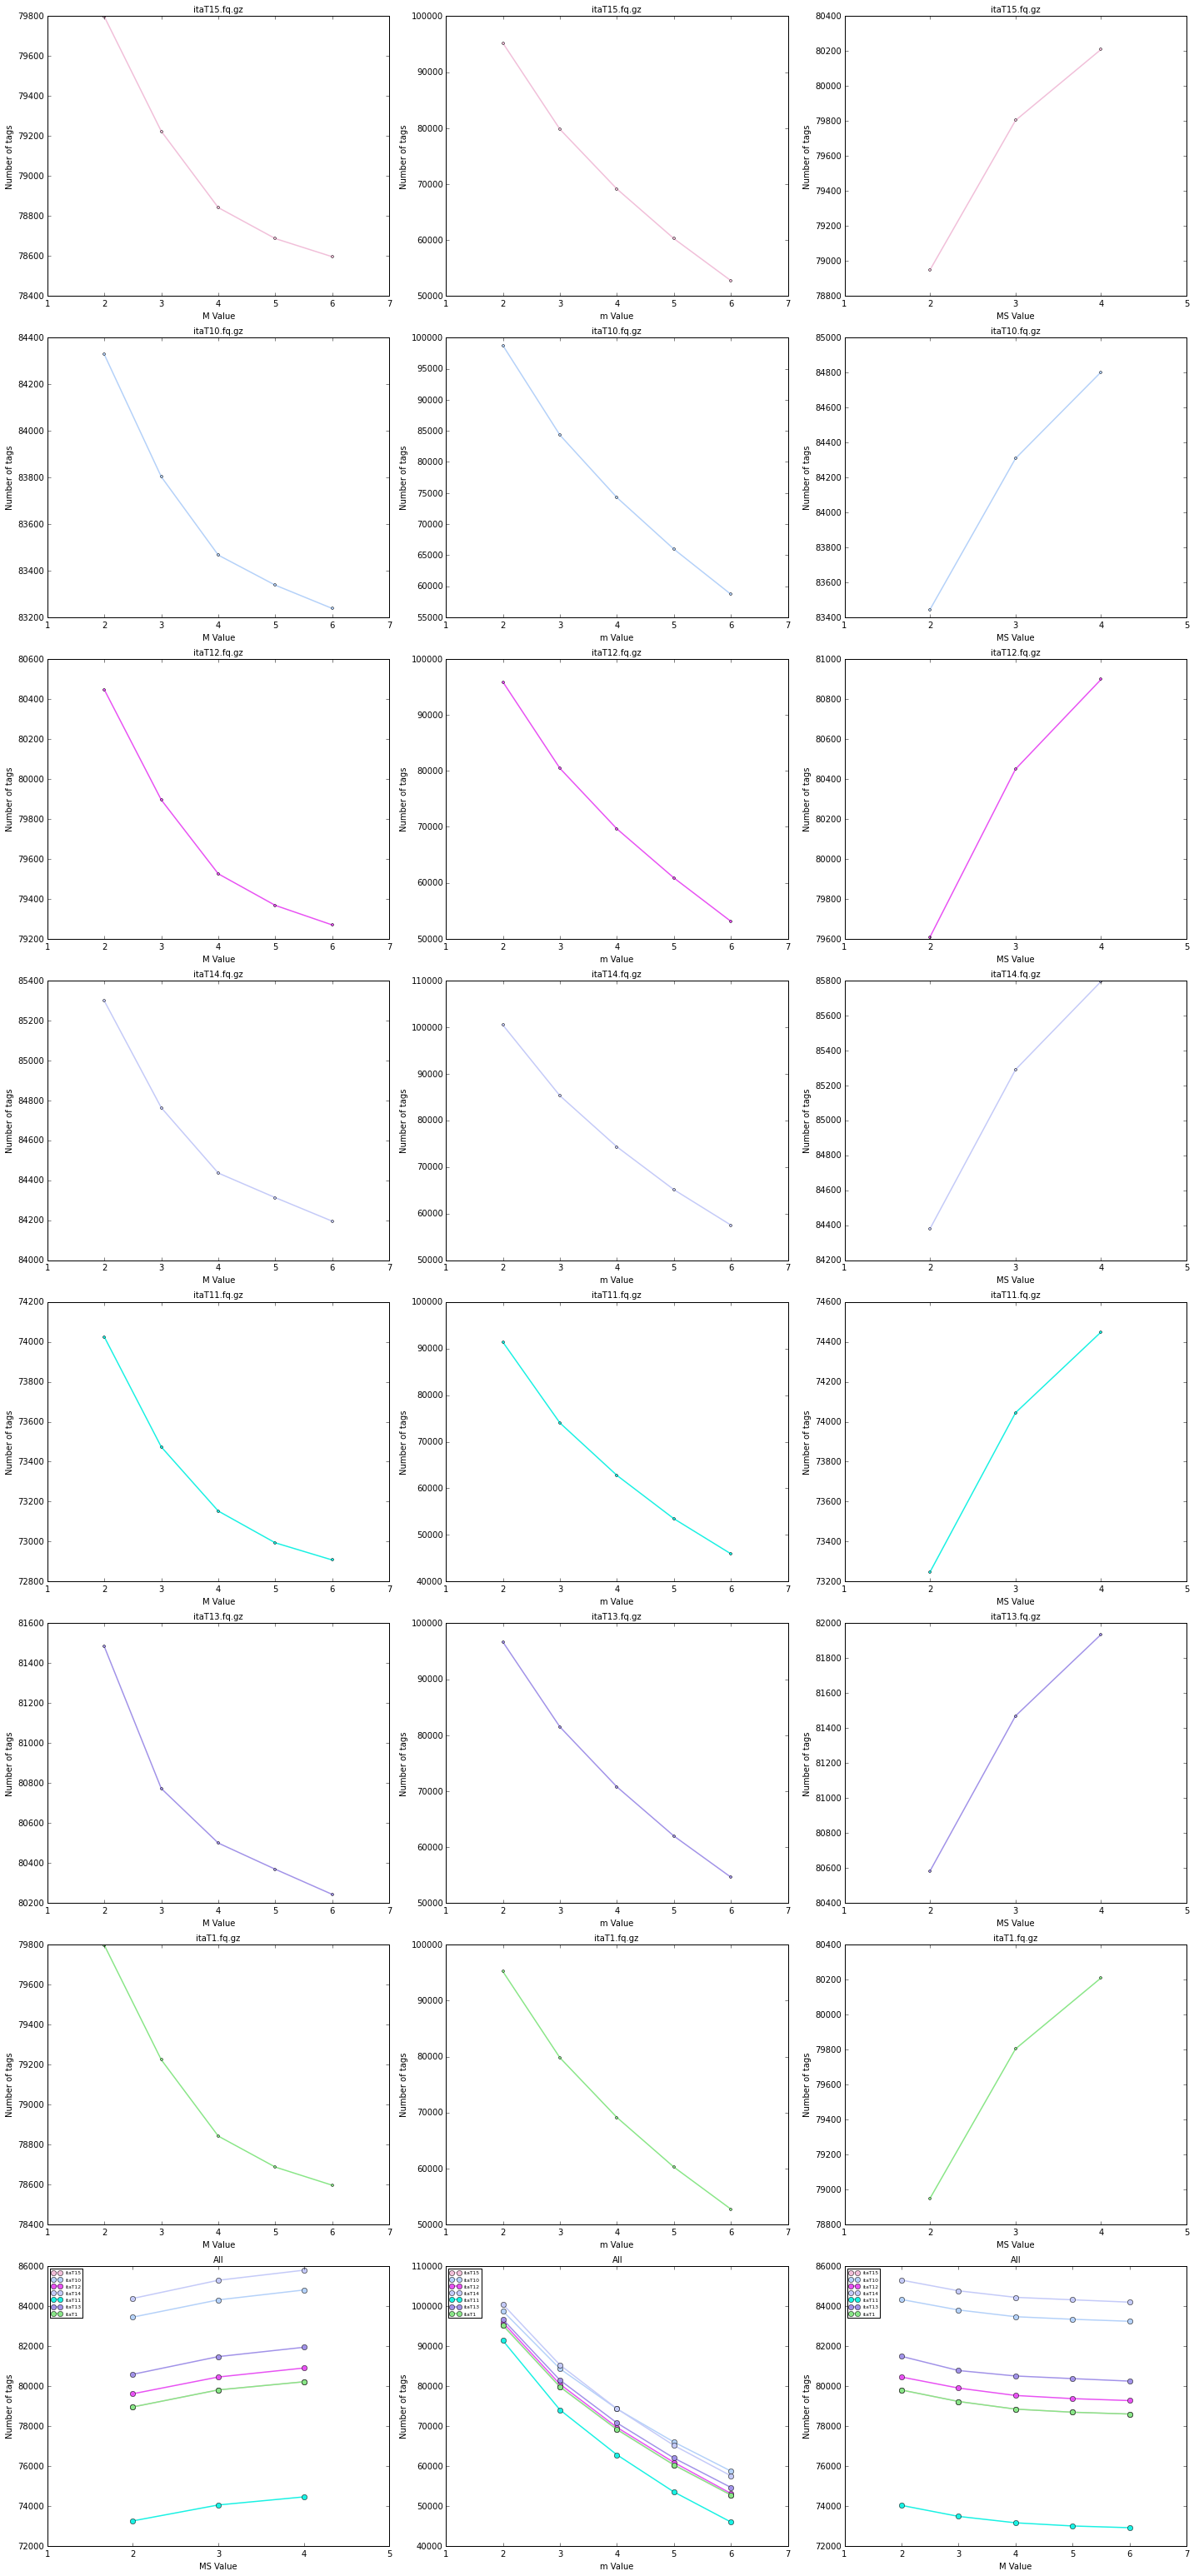

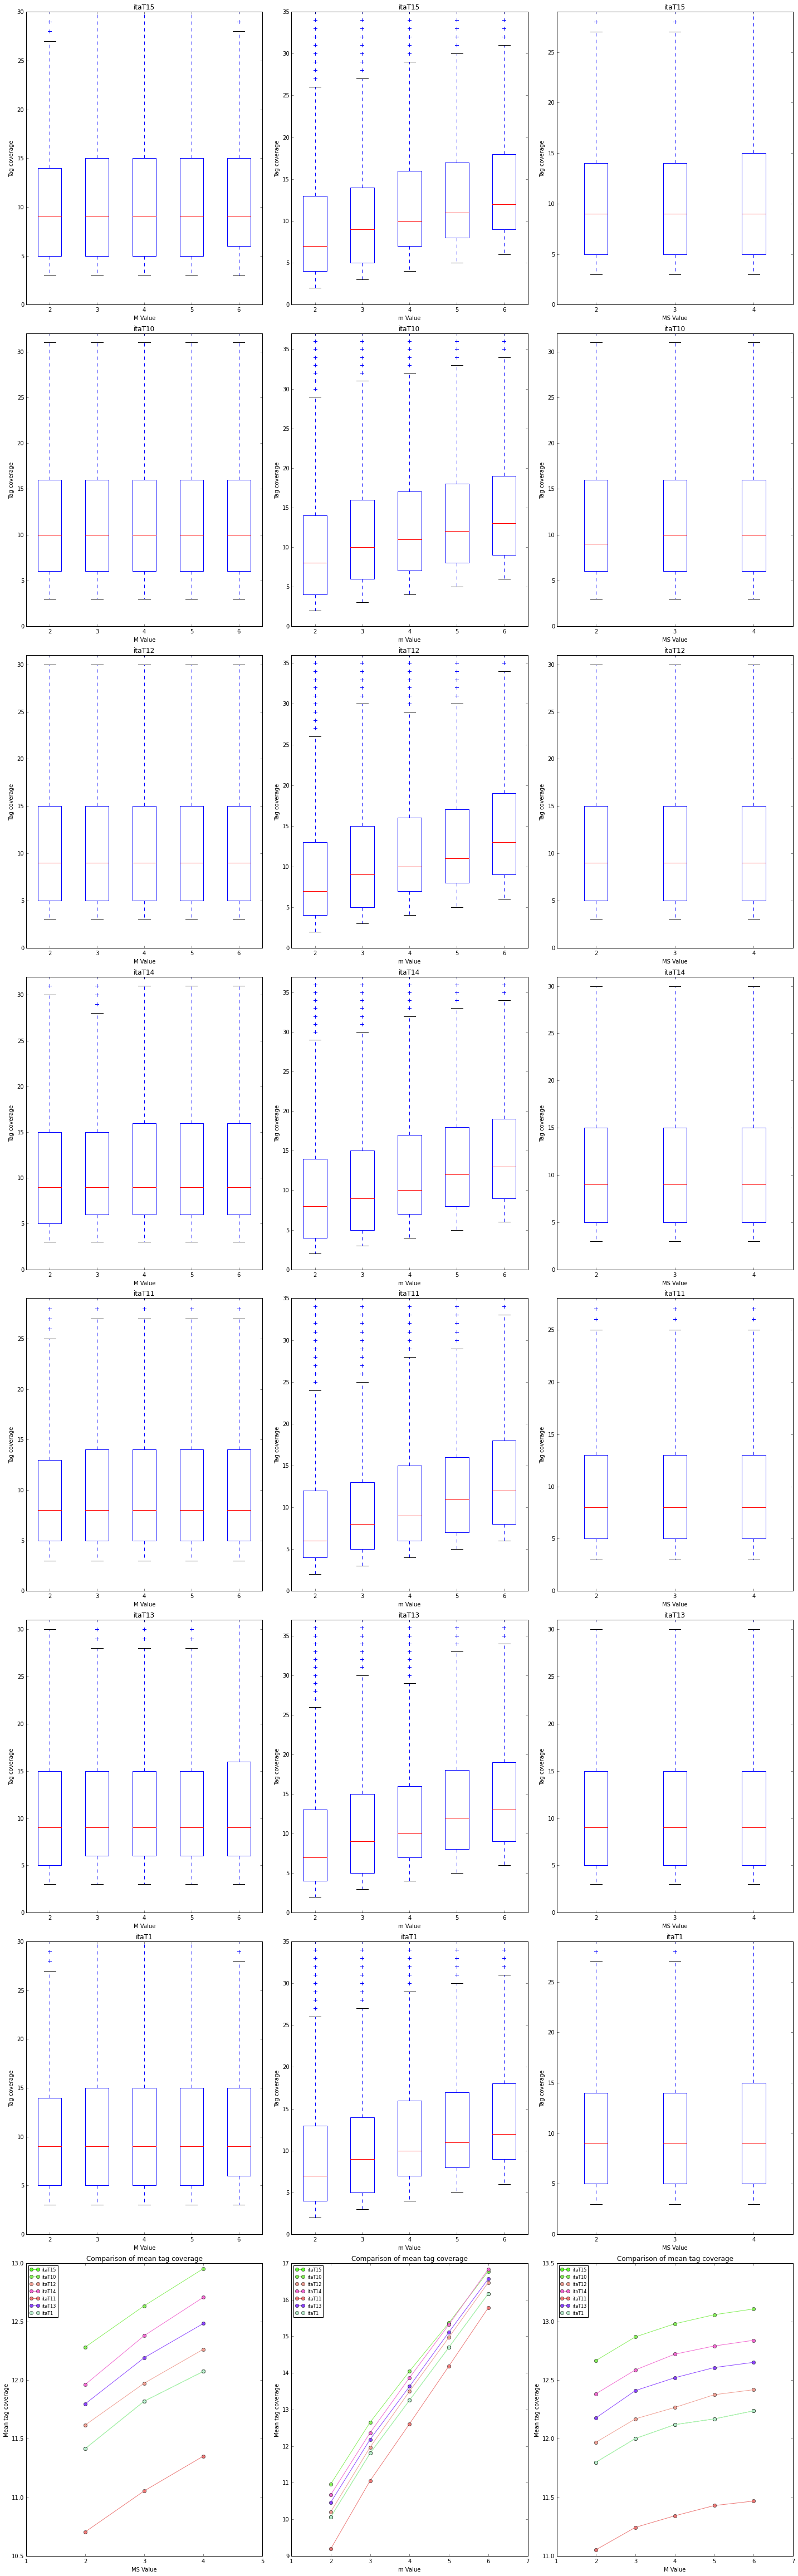

In [10]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

This is a nice dataset! One or two bad samples but no problem. . . 


<b>Final Ustacks commands</b> -------------------------------------------------------------------------------------------------------------------

Used M = 2, m = 3 and other defaults in final Ustacks

###2. Cstacks tests -------------------------------------------------------------------------------------------------------------------

In [11]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

## Get IDs for the test samples

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

itaT1, ID = 7
itaT10, ID = 2
itaT11, ID = 5
itaT12, ID = 3
itaT13, ID = 6
itaT14, ID = 4
itaT15, ID = 1


In [12]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks"
Parameter_dict["sample_ids"] = [2,7,4]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [2, 7, 4],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT10 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT14 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT1 7 -o /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT10 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT14 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT1 7 -o /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT10 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT14 -s /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/itaT1 7 -o /home/djeffrie/Data/RADseq/Ritalica/Incremental/Cstacks/n_3
Running Command line

n v

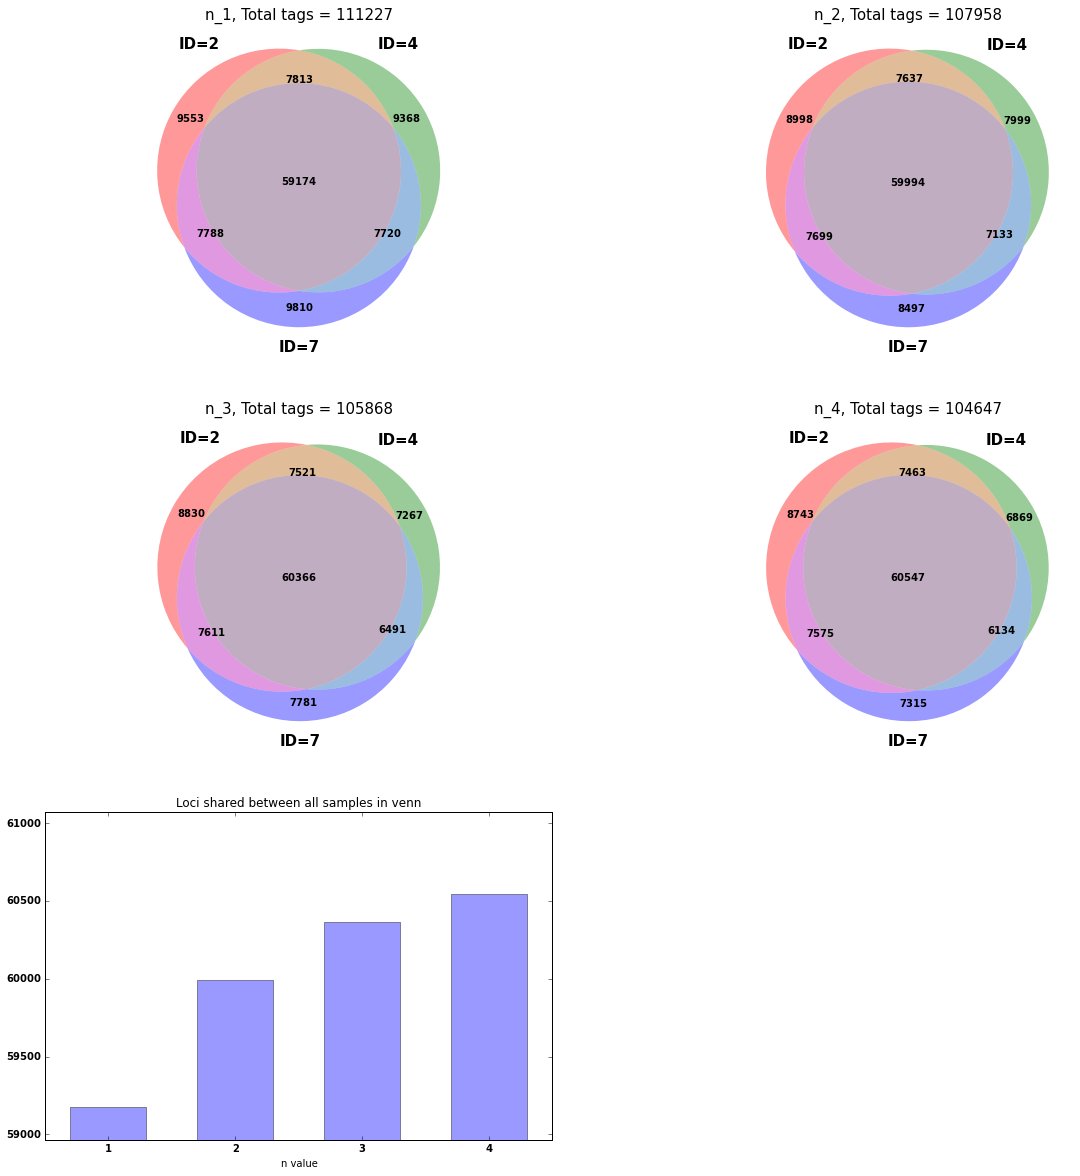

In [13]:
IncC.Incremental_C(Parameter_dict)  

### These look great. Very good sharing between samples. Although these samples are only one pop of several in this dataset. Should split these later on. 

<b>Final Cstacks command</b> ----------------------------------------------------------------------------------------------------------------------------

n = 2

All other parameters default

###3. Populations parameter tests  -----------------------------------------------------------------------------------------------------------------
    First I will run a PCA on the 3 populations in the data to see how related individuals are. 

Converting the vcf to plink

In [14]:
%%bash

## All data 
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1.vcf > /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/batch_1_altered_adegenet_plink-temporary.fam
written.
16326 variants loaded from .bim file.
51 people (0 males, 0 females, 51 ambiguous) loaded

In [15]:
%load_ext rpy2.ipython

In [17]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

In [18]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex information:
sexes <- read.delim("popmap.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


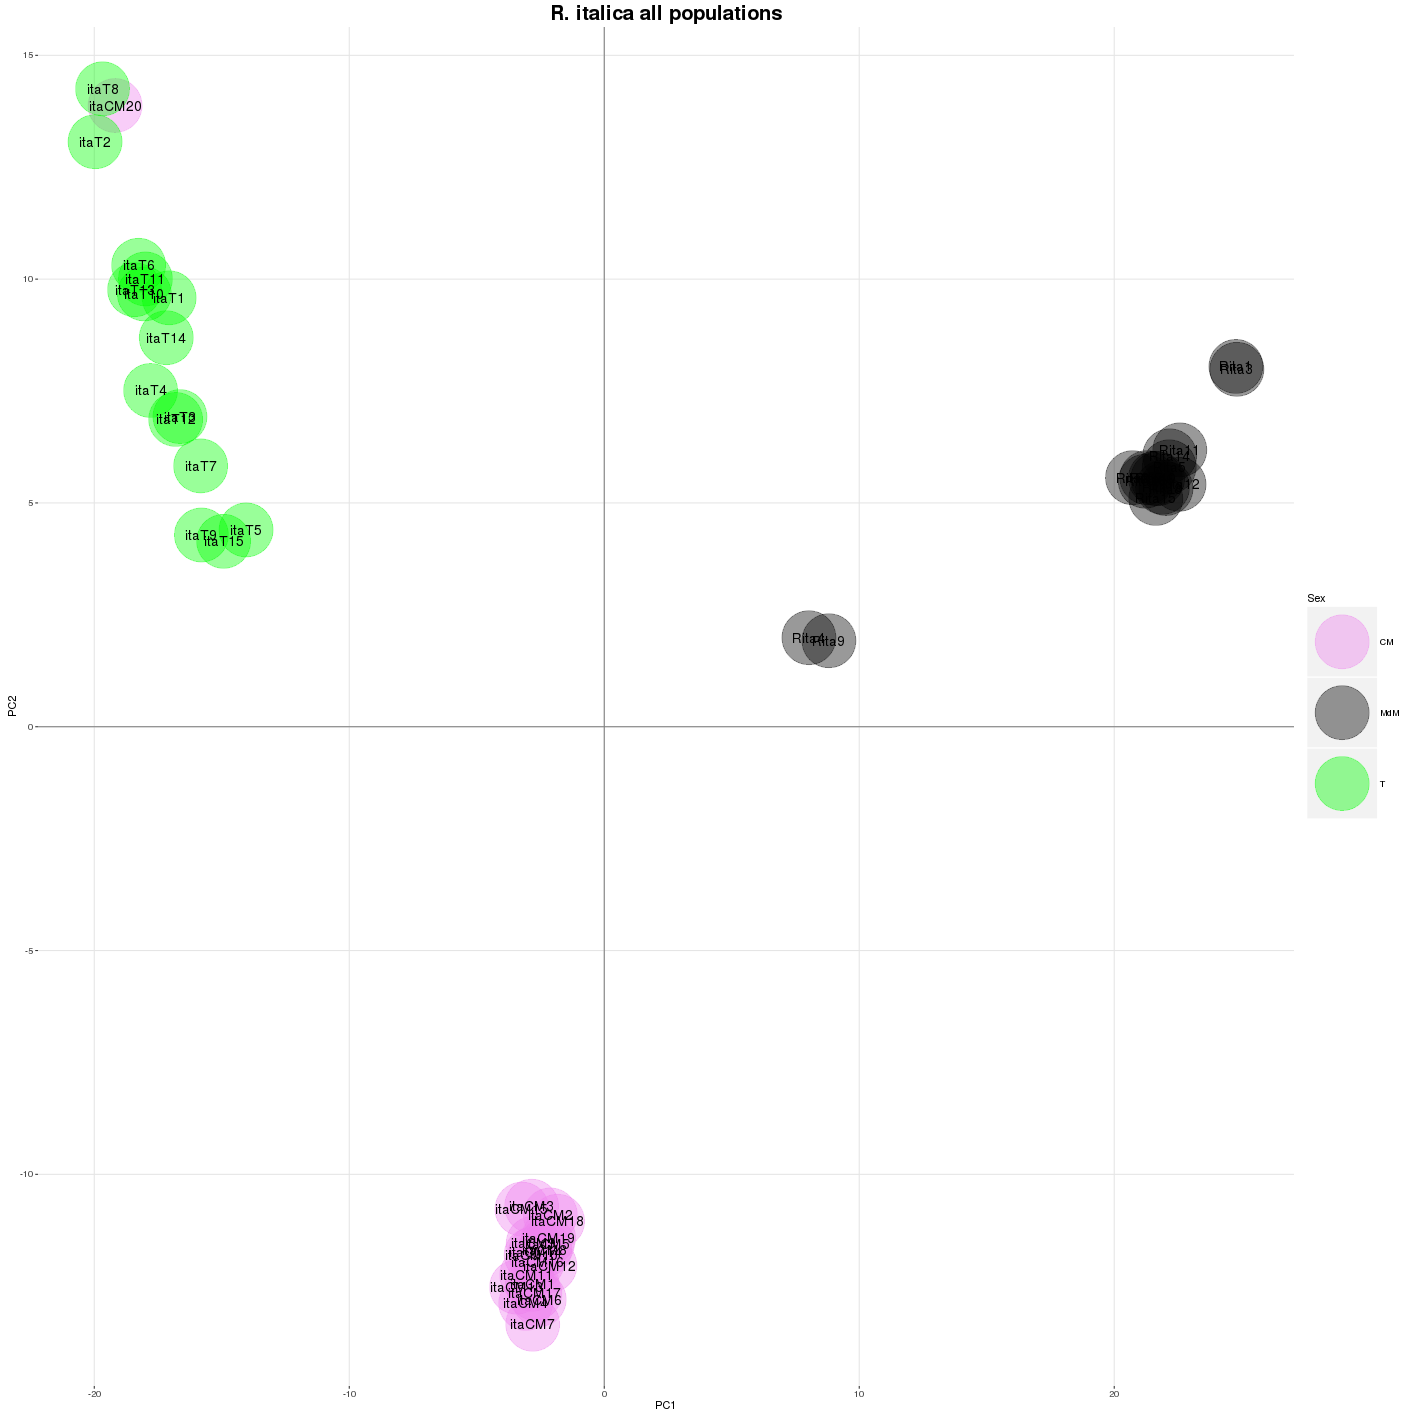

In [19]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. italica all populations", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green"),## Colours to use
           func_cex = 5) ## Size of points and text in plots

So the samples cluster as expected, however, it looks like itaCM20 has been mislabelled. Which is worrying. If this is off, then perhaps the male and female assignments are also off. If so that would explain why Guillaume finds no sex linked markers, despite it being a good library!

<b>So next steps</b>

<b> First Try all samples together </b>

1. Run Populations using male/female info for all samples at relaxed conditions
2. Remove any low quality samples
3. Run populations using more strict conditions
4. Search for sex linked loci
5a. If found Run PCA using Sex linked loci only to check to see there is only one Y haplotype

If no Sex linked markers found . . . 

5. Split populations up
6. For populations CM and MdM run populations separately (pop T doesn't have enough females to be useful)
7. Search for sex linked loci
8a. If found, run PCA again to check for multiple haplotypes
8b. If found in only one population, try the same loci in the other pop.
8c. If not found in either, try the a priori sex linked marker finder to try to check the sex assignments.

## 1. 
- First ran populations with relaxed filtering parameters to allow me to look at the amount of missing data per individual. Then remove these samples before doing other parameter tests . . 
     - Used r = 0.5 and p = 1 

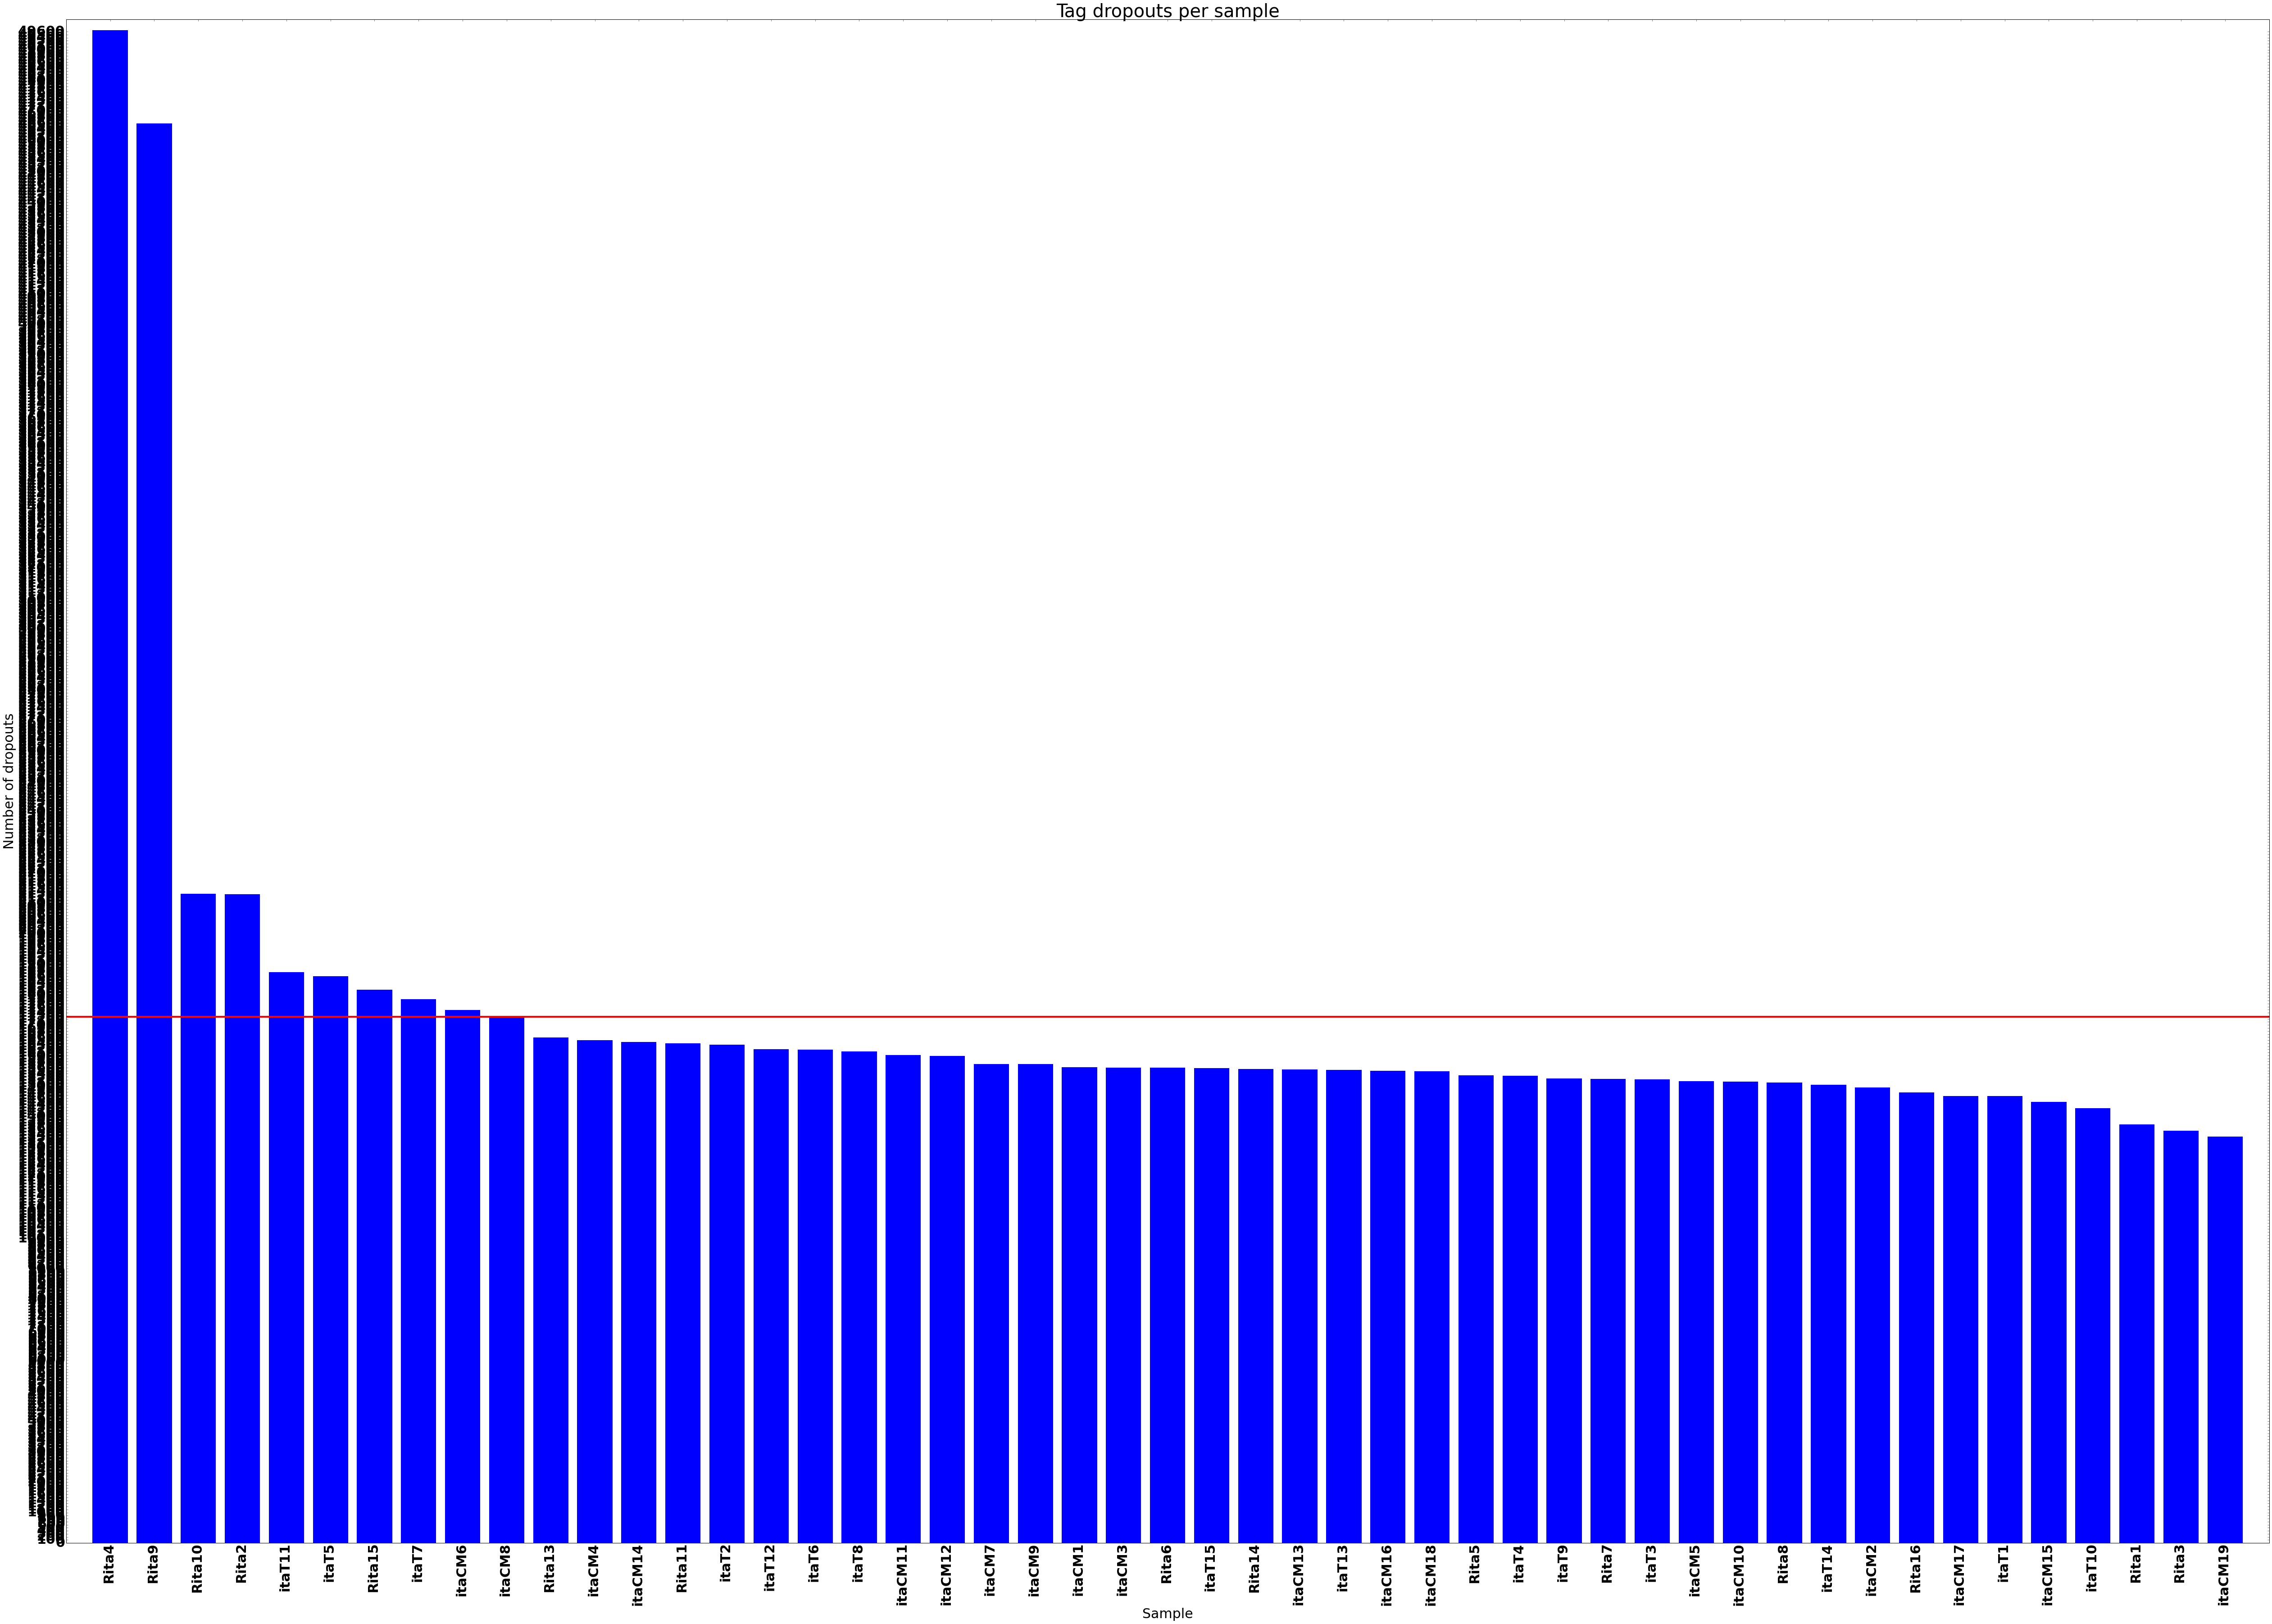

Outputs written to:
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/blacklist.txt


In [20]:
wd = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

<b>Removed:</b>

    Rita4 (F)
    Rita9 (M)
   

<b>Now testing populations parameters -r and -m (p tests not useful here as always want both sexes included)</b>

In [42]:
## params for the Incremental populations analyses

Analysis_parameters1 = {}

## Test parameters
Analysis_parameters1["parameters"] = ["r","m"]
Analysis_parameters1["p_vals"] = []
Analysis_parameters1["p_default"] = 2 ## The value of p when other params are being tested. Set as 2 for males and females!
Analysis_parameters1["r_vals"] = [0.75, 0.85, 0.9, 0.95]
Analysis_parameters1["r_default"] = 0.75 ## The value of r when other params are being tested. 
Analysis_parameters1["m_vals"] = [2,3,4,5,6]
Analysis_parameters1["m_default"] = 3 ## The value of m when other params are being tested. 
Analysis_parameters1["Populations_test_dir_path"] = "/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/"
Analysis_parameters1["run_cline_switch"] = 1 ## run command line or not. 

## Mandatory Populations options
Analysis_parameters1["b"] = 1 ## batch ID
Analysis_parameters1["P"] = "/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/"## Path to stacks outputs
Analysis_parameters1["M"] = "/home/djeffrie/Data/RADseq/Ritalica/Incremental/Populations/sex_info_kept.txt" ## All samples

## Outputs parameters
Analysis_parameters1["vcf"] = True
Analysis_parameters1["vcf_haplotypes"] = True

## Optional parameters
Analysis_parameters1["t"] = 7 ## number of threads
Analysis_parameters1["min_maf"] = 0.05 ## number of threads

#Analysis_parameters1["B"] = None ## Locus blacklist
Analysis_parameters1["write_single_snp"] = True ## switch to write first snp of locus or not.
Analysis_parameters1["fstats"] = False

## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations/ -M /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations/sex_info_kept.txt -t 7 -r 0.75 -p 2 -m 3 --min_maf 0.05 --write_single_snp --vcf --vcf_haplotypes    ## FINISHED 
Files moved to /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations//r_tests/r_075
## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations/ -M /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations/sex_info_kept.txt -t 7 -r 0.85 -p 2 -m 3 --min_maf 0.05 --write_single_snp --vcf --vcf_haplotypes    ## FINISHED 
Files moved to /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations//r_tests/r_085
## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Lchricahuensis/2Lanes/Incremental/Populations/ -M /home/djeffrie/Data/RADseq/Lchricahuensis/2La

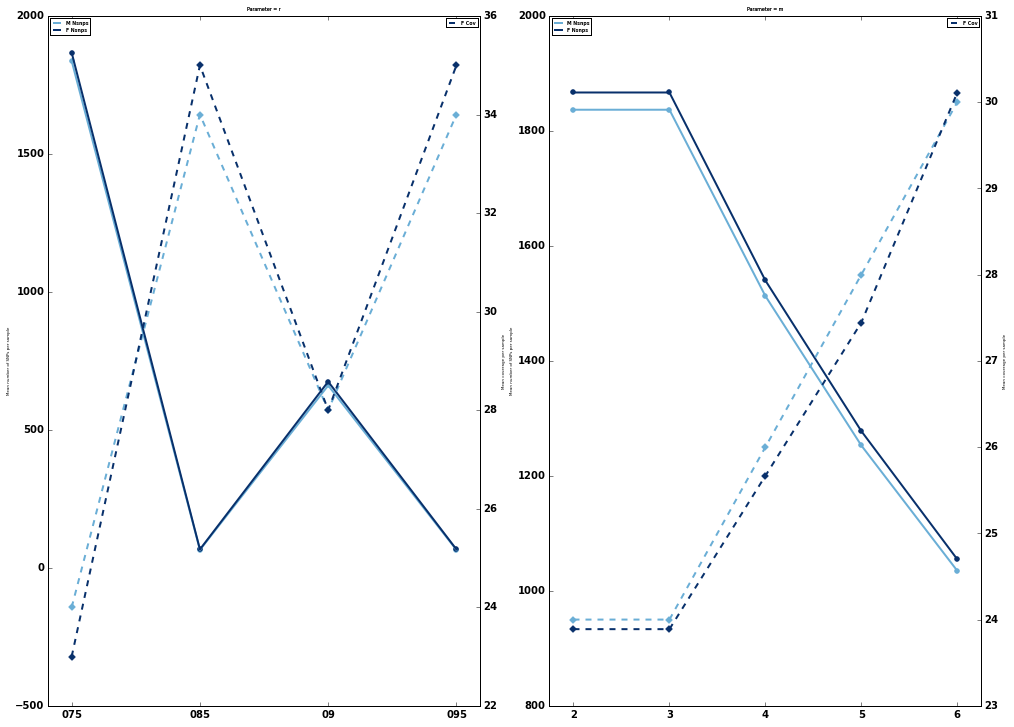

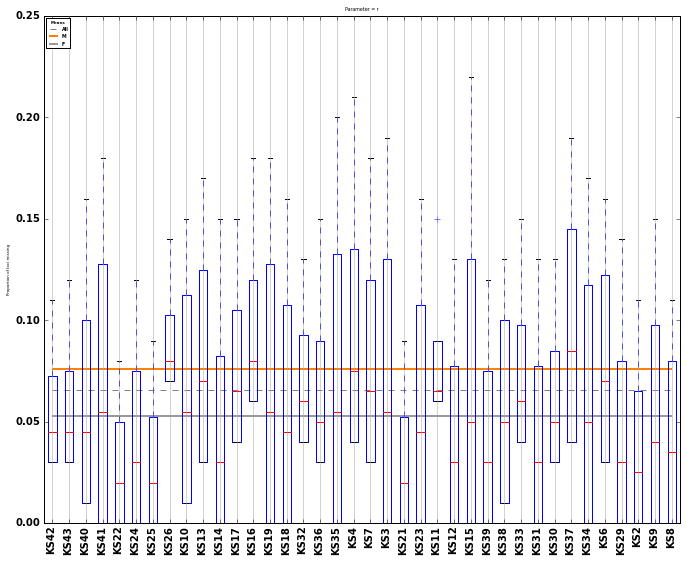

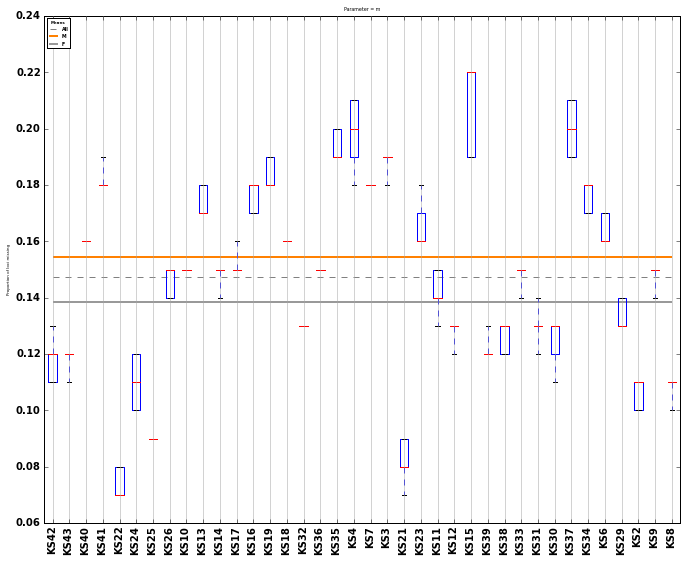

In [43]:
Sample_data, Locus_data, group_info = IncPop.Incremental_Pop(Analysis_parameters1)

Dropout between samples is pretty variable and often quite high. Can see this in the Cstacks tests too. This is likely going to result in few loci meeting filtering criteria

<b>Final Populations command </b>

-p 2 

-r 0.75

-M sex_info_kept.txt

all other parameters defaults

<b>Check the final snp dataset, e.g. amount of locus/ sample dropout, coverage etc</b>

In [27]:
final_vcf = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/after_sample_filtering/batch_1.vcf"
final_popmap = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/after_sample_filtering/sex_info_kept.txt"

Number of tags =  35736
Average tag coverage 14.6502960243 (+- 9.16960004422 )


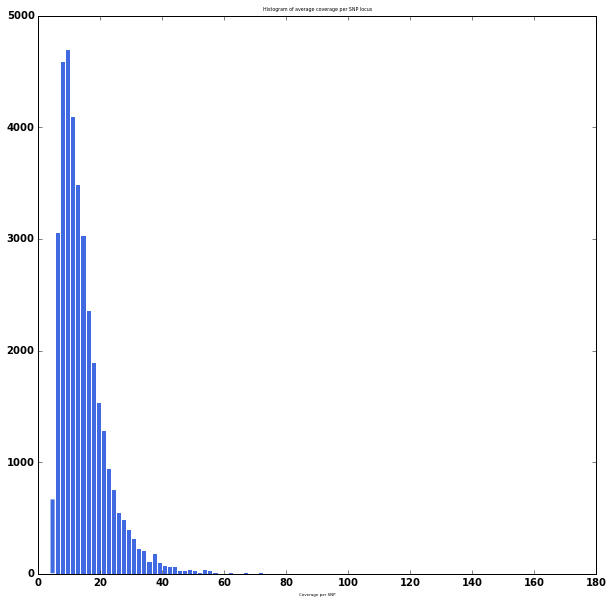

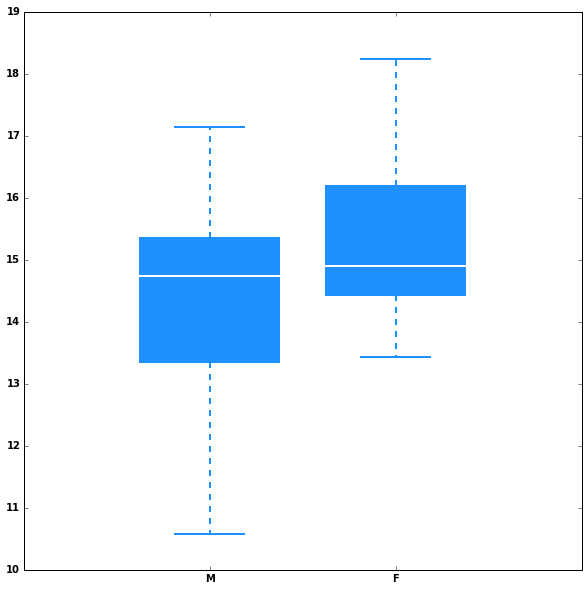

In [28]:
tag_means, pop_cov_data = MISC.Super_av_tag_cov(final_vcf, popmap = final_popmap)

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

In [31]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/after_sample_filtering/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/All_pops/after_sample_filtering/sex_ID_info_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 35736
Number of samples = 47
Number of loci with too few samples = 0
Number of loci with low MAF = 14961
Number of loci with enough data = 20774
Number of putative X linked snps = 1
Number of putative X linked tags = 1
Number of putative Z linked markers = 4
Number of putative Z linked tags = 3


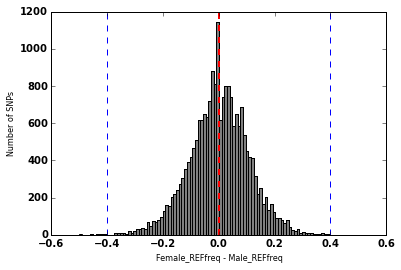


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 35736
Number of samples = 47
Number of loci with too few samples = 0
Number of loci with low MAF = 14961
Number of loci with enough data = 20774
Number of putative X linked snps = 17
Number of putative X linked tags = 13
Number of putative Z linked markers = 12
Number of putative Z linked tags = 11

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 15
Number of males: 32
Number of Putative Y linked tags: 1
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 15
Final number of ZW tags = 14
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


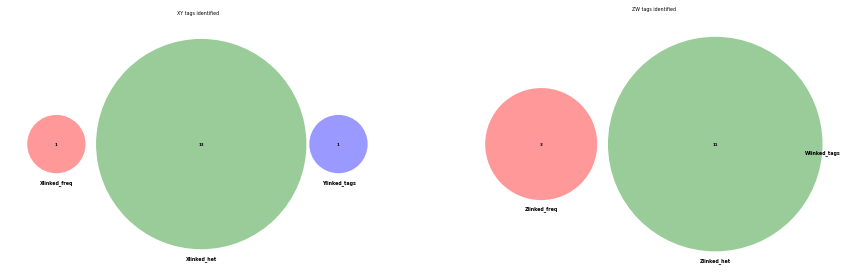

In [32]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So given the number of XY and ZW tags are almost the same, I cannot say that there are any putative Sex linked markers identified from the full dataset.

I will now split the dataset down into the three populations, CM, MdM and T. However, T has only 2 females and so is not useful for this. CM has 9 females and so will be the most powerful, MdM has 5 females, so may be ok, but will likely give many false positives. 

## Population CM

First, I will run a PCA for all SNPs in this population, just to check that there is no cryptic structure which may interfere with the search for SL loci

In [35]:
%%bash

## All data 
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1.vcf > /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1_altered_adegenet_plink-temporary.fam
written.
28284 variants loaded from .bim file.
19 people (0 males, 0 females, 19 ambig

In [38]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex information:
sexes <- read.delim("sex_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



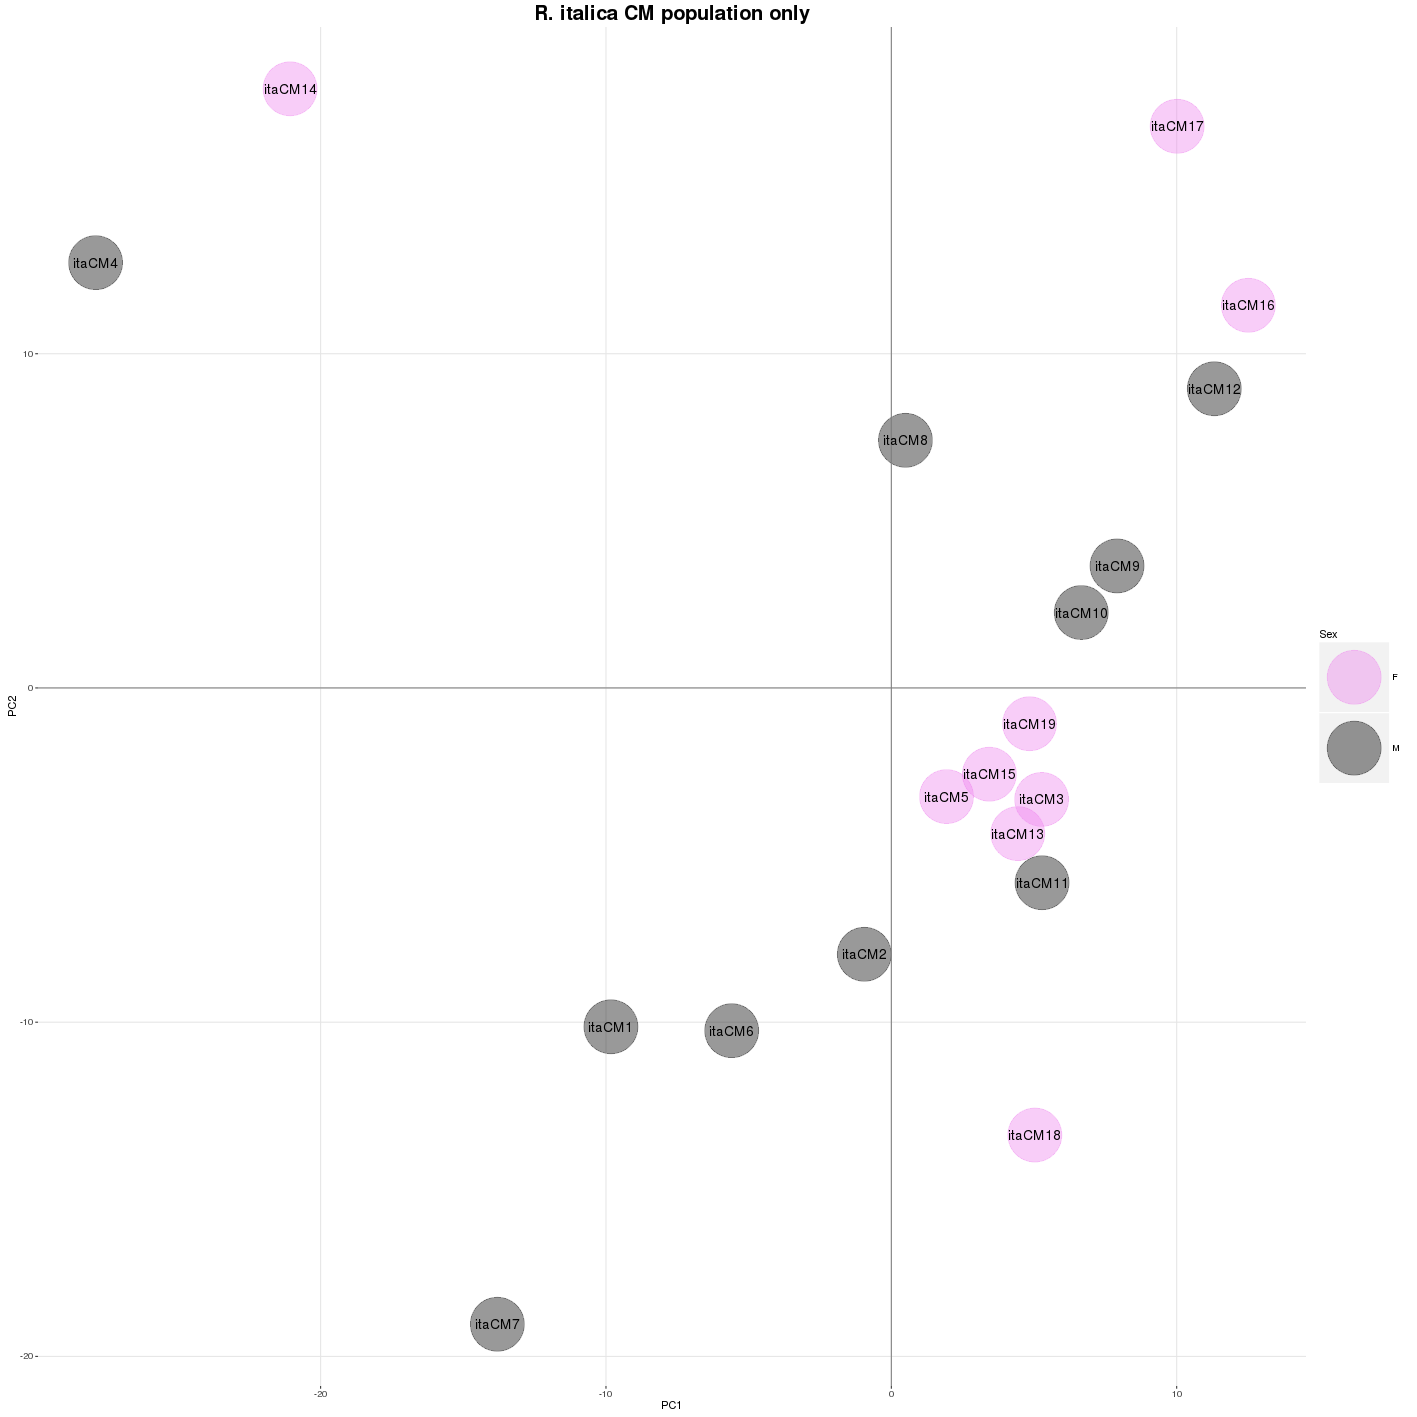

In [45]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. italica CM population only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green"),## Colours to use
           func_cex = 5) ## Size of points and text in plots

<b> Ok, so no obvious major structuring that would cause problems. There are a couple of outlier samples, but this shouldn't cause too much trouble. </b>

So Now looking for the sex linked markers in the CM pop

In [4]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/CM_sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 28284
Number of samples = 19
Number of loci with too few samples = 0
Number of loci with low MAF = 7120
Number of loci with enough data = 21163
Number of putative X linked snps = 34
Number of putative X linked tags = 34
Number of putative Z linked markers = 19
Number of putative Z linked tags = 19


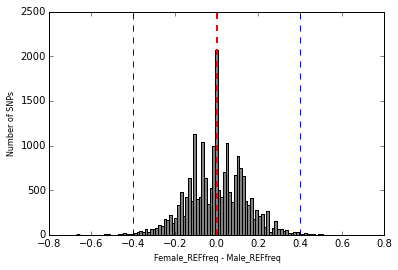


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 28284
Number of samples = 19
Number of loci with too few samples = 5450
Number of loci with low MAF = 7120
Number of loci with enough data = 15678
Number of putative X linked snps = 23
Number of putative X linked tags = 23
Number of putative Z linked markers = 11
Number of putative Z linked tags = 11

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 9
Number of males: 10
Number of Putative Y linked tags: 56
Number of Putative W linked tags: 16

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers

 ## After merging tags accross methods ## 

Final number of XY tags = 107
Final number of ZW tags = 46


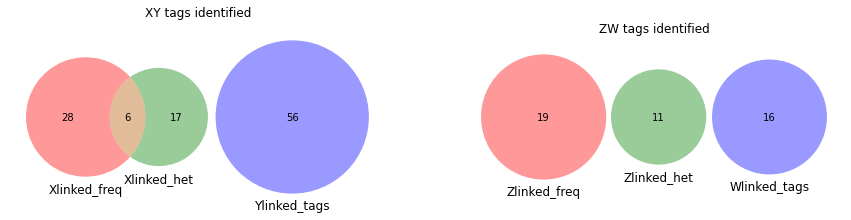

In [5]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### So this is a bit better, It seems that there are a lot of XY tags, but the number of ZW - looking markers is still high. 

This could be because the Male and Female assignments are wrong in a couple of samples. I will therefore perform another PCA using just the loci identified as XY from Methods 1 & 2 above. 


In [112]:
import vcf
from Bio import SeqIO


vcfpath = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1.vcf.altered"
XY_tags = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/Putative_XYlinked_makers.fa"

XY_set = set(XYset)

SL_vcf = open("/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2.vcf", 'w')

XYtags_parsed = SeqIO.parse(XY_tags, "fasta")
vcf_parsed = vcf.Reader(open(vcfpath, 'r'))

XY_ids = []
    
for line in open(vcfpath,'r').readlines():
    if line.startswith("#"):
        SL_vcf.write(line)
    else:
        if line.split()[2] in XY_set:
            SL_vcf.write(line)
SL_vcf.close()

In [116]:
%%bash


## XY linked data only
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2.vcf > /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet.vcf  --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet_plink.raw


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet_plink.raw.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet_plink.raw
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet_plink.raw-temporary.bed
+
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_methods_1_2_altered_adegenet_plink.raw-temporary.bim
+
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/XY_linked_snps_metho

In [117]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_methods_1_2_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex information:
sexes <- read.delim("sex_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



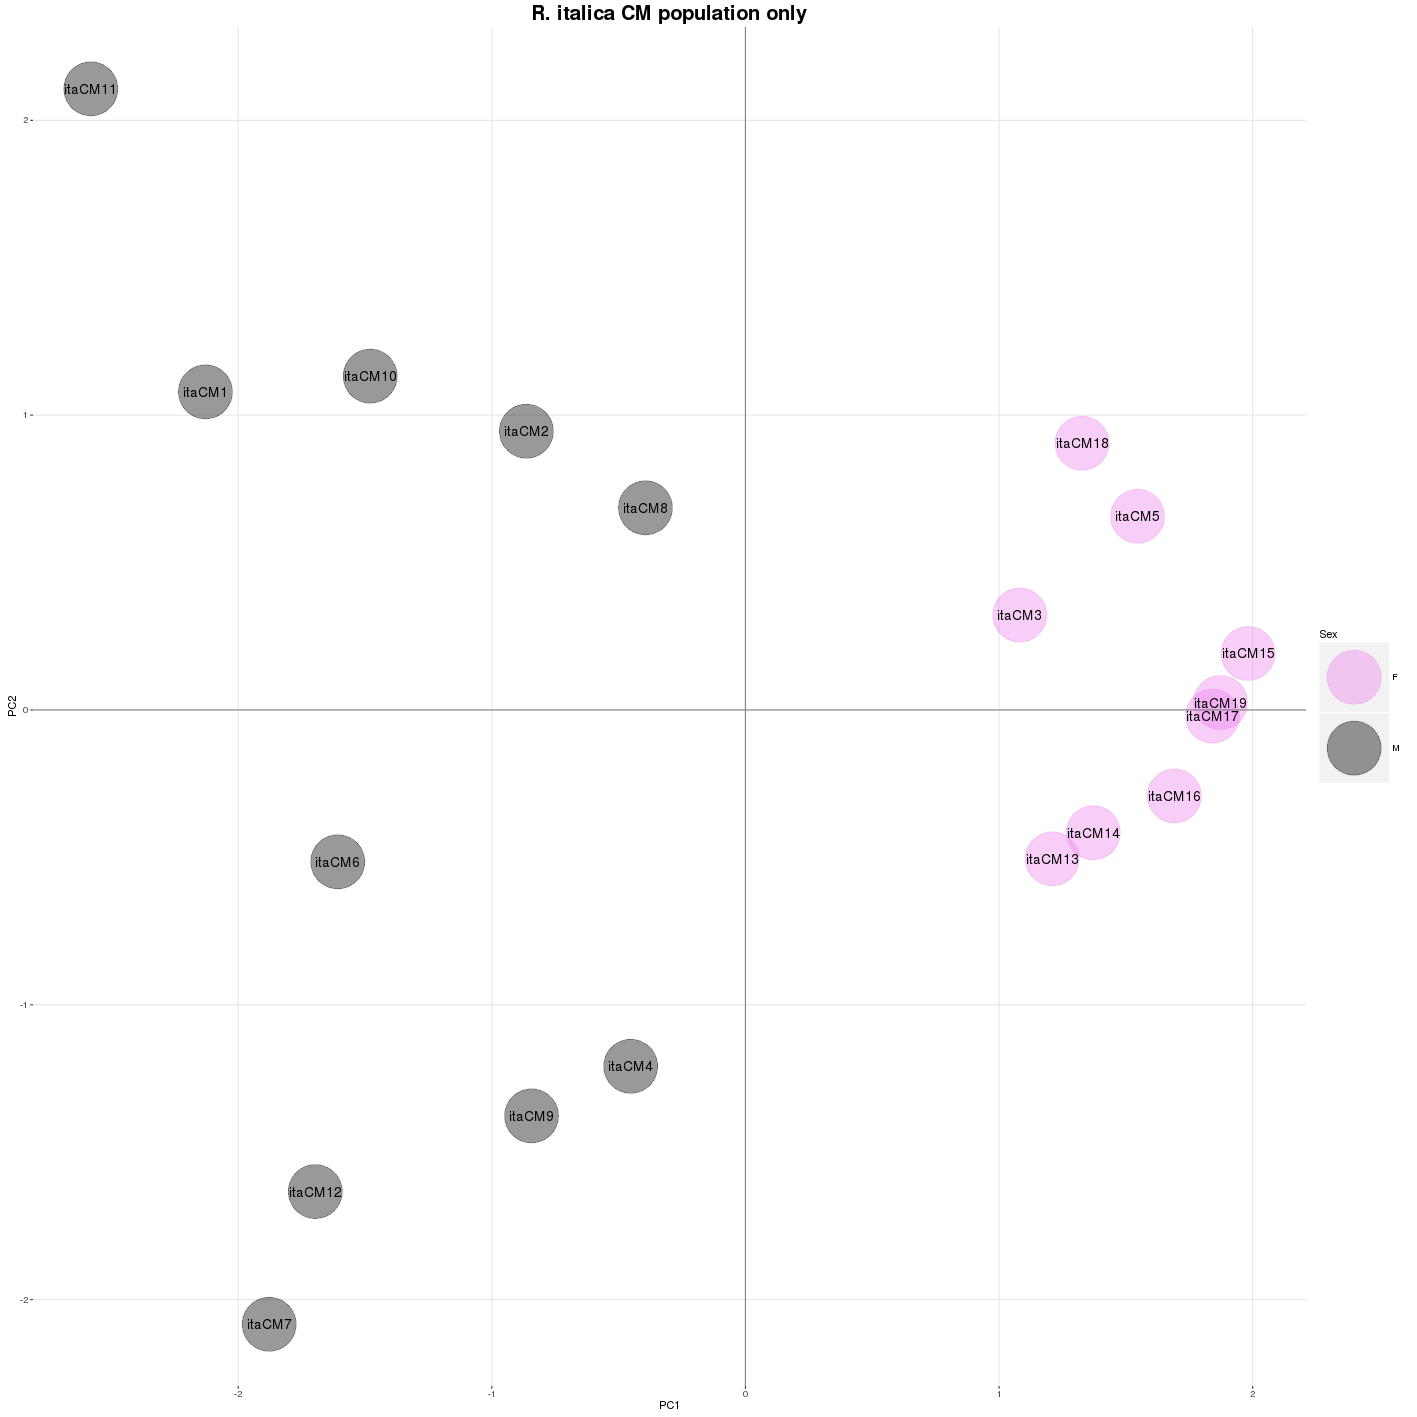

In [118]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. italica CM population only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green"),## Colours to use
           func_cex = 5) ## Size of points and text in plots

It might be that, again, we have multiple Y haplotypes in this population, with these two groups of 5 males being separate from eachother on PC2. (PC3 doesn't show anything new, so not shown). 

So, lets try one more subsetting, within Pop CM. CM_1 = All females plus the 5 males in the top group on PC2 in the plot above. CM_2 = All females and the remaining males. 

## CM_1

In [135]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/Pop_CM_1/batch_1_CM_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/Pop_CM_1/CM_1_sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.9 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.9 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 19735
Number of samples = 14
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 19734
Number of putative X linked snps = 60
Number of putative X linked tags = 50
Number of putative Z linked markers = 92
Number of putative Z linked tags = 76


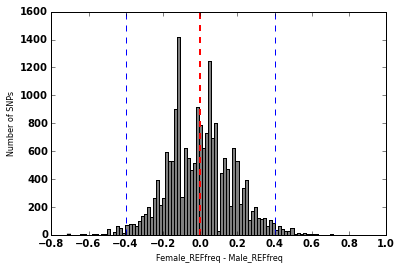


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 19735
Number of samples = 14
Number of loci with too few samples = 4917
Number of loci with low MAF = 0
Number of loci with enough data = 14663
Number of putative X linked snps = 3
Number of putative X linked tags = 2
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 9
Number of males: 5
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 50
Final number of ZW tags = 76
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers


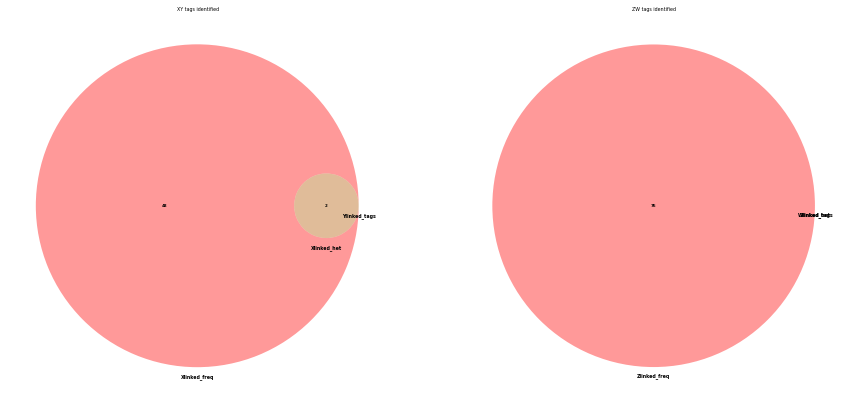

In [136]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

## CM_2

In [175]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/Pop_CM_2/batch_1_CM_2.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/Pop_CM_2/CM_2_sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.9 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.9 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 19595
Number of samples = 14
Number of loci with too few samples = 1267
Number of loci with low MAF = 0
Number of loci with enough data = 18327
Number of putative X linked snps = 35
Number of putative X linked tags = 32
Number of putative Z linked markers = 101
Number of putative Z linked tags = 91


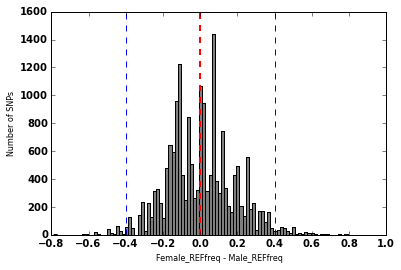


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 19595
Number of samples = 14
Number of loci with too few samples = 6176
Number of loci with low MAF = 0
Number of loci with enough data = 13197
Number of putative X linked snps = 13
Number of putative X linked tags = 10
Number of putative Z linked markers = 2
Number of putative Z linked tags = 2

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 9
Number of males: 4
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 36
Final number of ZW tags = 91
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers


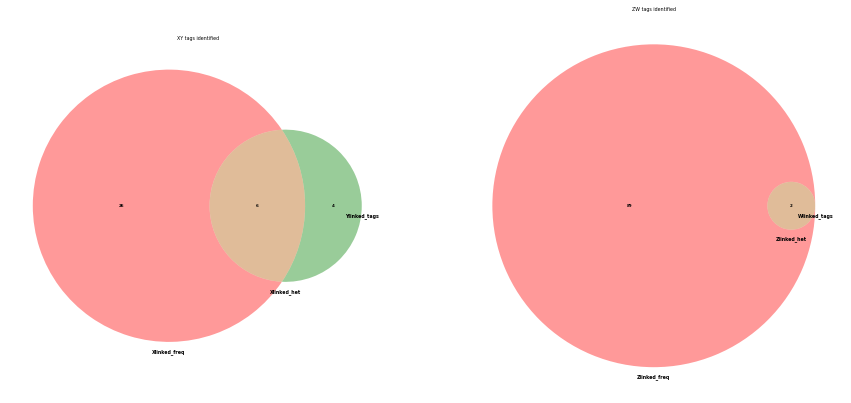

In [176]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

Ok, so that did not work at all! In fact I have to be very strict with the parameters for identifying the SL markers otherwise a large number of false positives are also identified. I think this is simply down to the low numbers of the heterogametic sex in these subsets.


So I will try now with the MdM population. It has fewer females, but having more of the heterogametic sex is best. So 10 males and 5 females is perhaps not so bad.

# Population MdM

In [6]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/sex_ID_info_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 8 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1## (Default = 0.9) The minimum number of the homogametic sex which must not have the minor allele for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 8 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 22133
Number of samples = 13
Number of loci with too few samples = 6140
Number of loci with low MAF = 5402
Number of loci with enough data = 10590
Number of putative X linked snps = 143
Number of putative X linked tags = 143
Number of putative Z linked markers = 33
Number of putative Z linked tags = 33


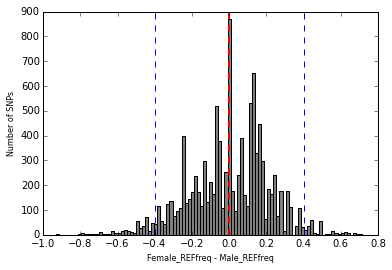


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 22133
Number of samples = 13
Number of loci with too few samples = 5588
Number of loci with low MAF = 5402
Number of loci with enough data = 10590
Number of putative X linked snps = 198
Number of putative X linked tags = 198
Number of putative Z linked markers = 149
Number of putative Z linked tags = 149

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 4
Number of males: 9
Number of Putative Y linked tags: 12
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM

 ## After merging tags accross methods ## 

Final number of XY tags = 313
Final number of ZW tags = 168


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


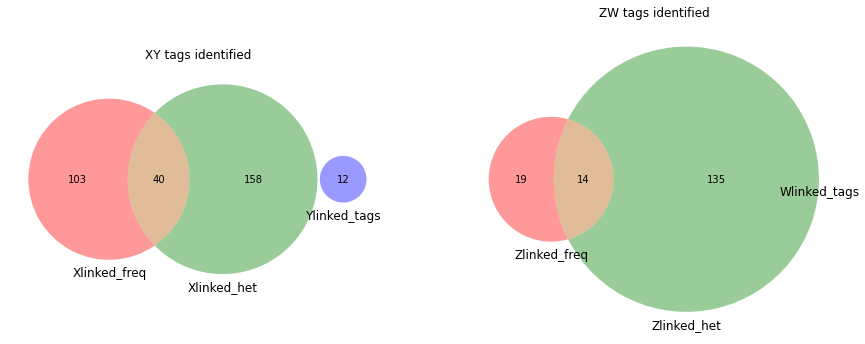

In [7]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So . . . . the number of XY tags is pretty variable depending on how strict I am with the analyses parameters here. By far the most sensitive approach in #2, the heterozygosity approach. However, These approaches do identify some candidate XY tags. 

I will again run a PCA to look at the signal in these tags, however, I think the best thing to do is use just those identified by BOTH approach 1 and 2. 

In [177]:
import vcf
from Bio import SeqIO


vcfpath = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/batch_1.vcf.altered"
XY_tags = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/Putative_XYlinked_makers.fa"

XY_set = set(XYset)

SL_vcf = open("/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2.vcf", 'w')

XYtags_parsed = SeqIO.parse(XY_tags, "fasta")

XY_1_2_set = []

for record in XYtags_parsed:
    if "Xlinked_het_Xlinked_freq" in record.id:

        XY_1_2_set.append(record.id.split("_")[2])



vcf_parsed = vcf.Reader(open(vcfpath, 'r'))

XY_ids = []
    
for line in open(vcfpath,'r').readlines():
    if line.startswith("#"):
        SL_vcf.write(line)
    else:
        if line.split()[2] in XY_1_2_set:
            SL_vcf.write(line)
SL_vcf.close()

In [166]:
%%bash

## XY linked data only
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2.vcf > /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered.vcf   --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/XY_linked_snps_methods_1_AND_2_altered_plink-temporary.

In [168]:
%%R

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_MdM/")

## Sex linked SNPs only (about 150)
XY_linked_data <- read.PLINK('XY_linked_snps_methods_1_AND_2_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_ID_info_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca3 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



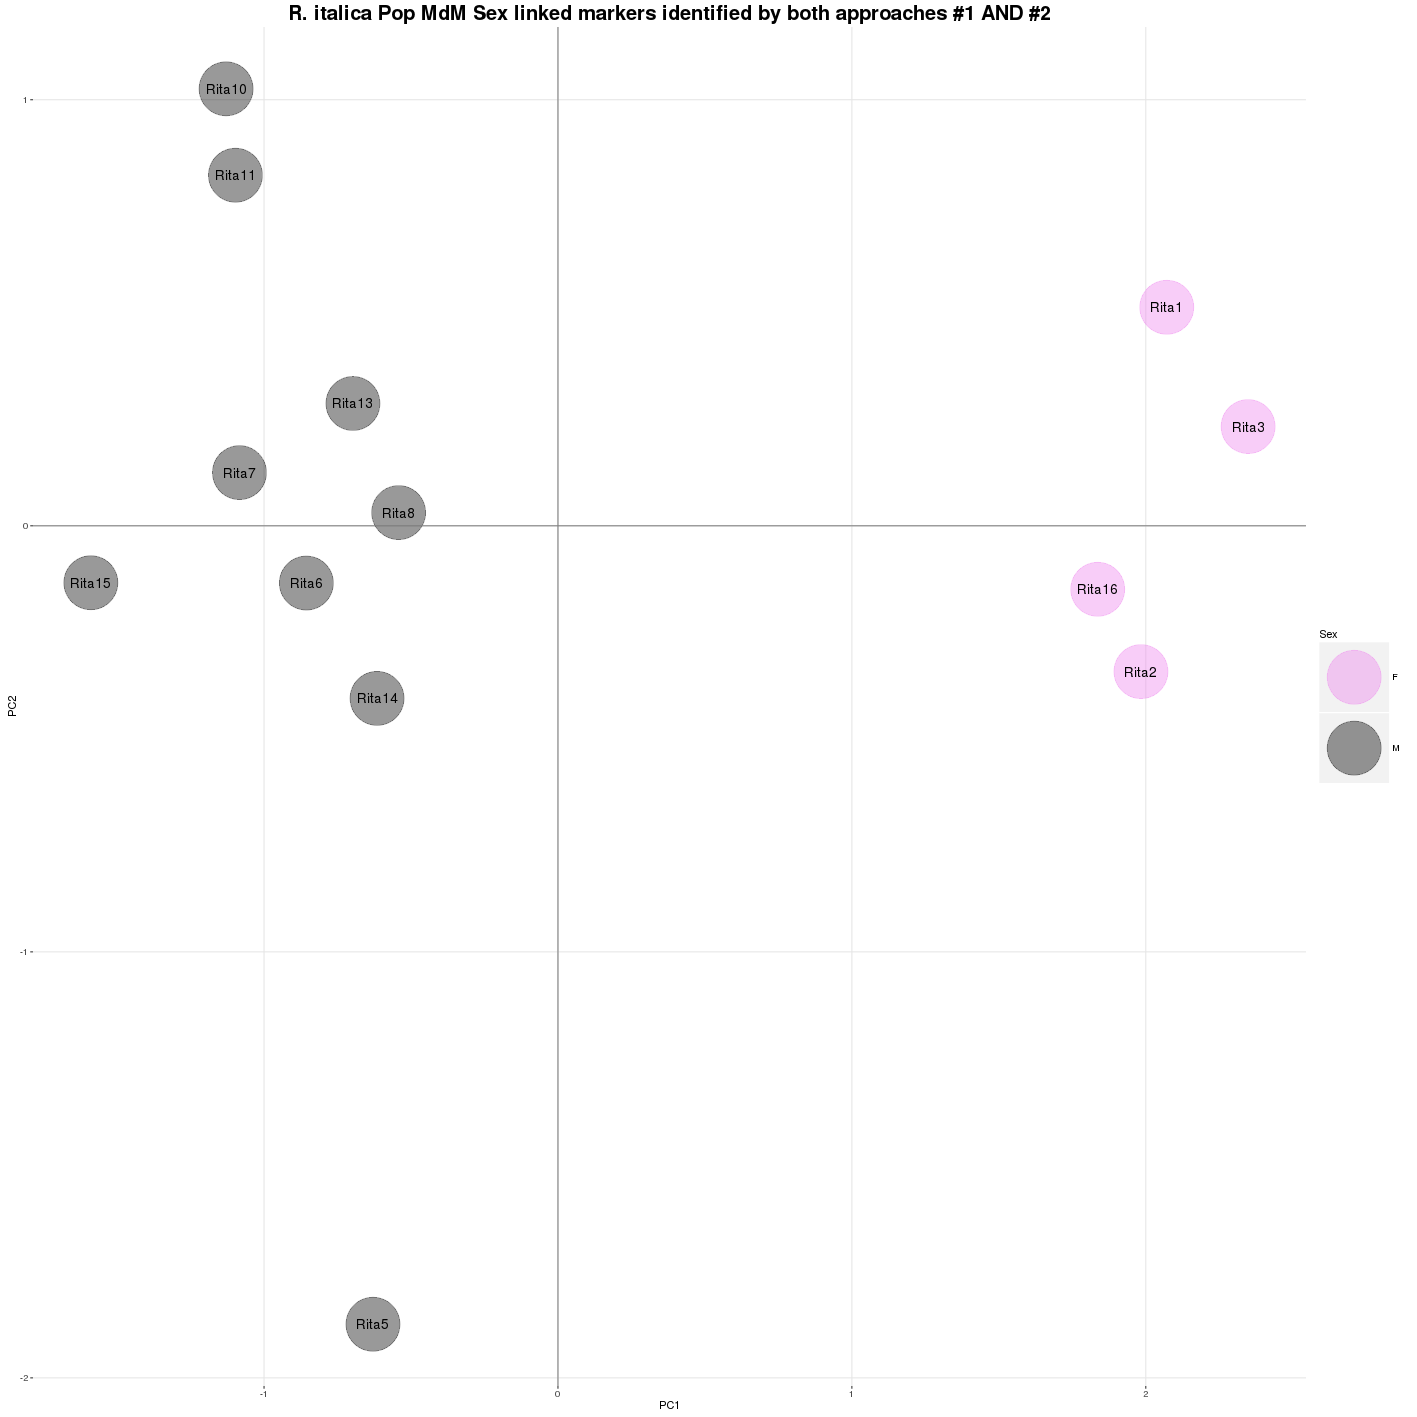

In [174]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca3,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. italica Pop MdM Sex linked markers identified by both approaches #1 AND #2", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So, these loci may well be sex linked. However, the PCA is certainly not a validation for this. It only serves to confirm that the male and females are split with no exceptions which might be missassigned. The only bioinformatic based validation of these loci would be to map them to the genome and see if they all map to the same region. If multiple loci map to the same chromosome then that is a good sign that these loci are indeed linked to sex.

##SUMMARY

So R. italica is a complicated species. The full dataset, despite having, in theory, enough males and females, does not confidently identify a set of sex linked XY or ZW markers. 

Splitting the populations up is somewhat useful. Population Putative sex linked markers in both CM and MdM are biased towards an XY system. However there are many false positives in both analyses. It is therefore likely that some truly XY linked markers have been identified, however the only validation for this will be if a large proportion of them map to the same chromosome in Xenopus. This remains to be seen. 